In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator


In [2]:
training_data_generator = ImageDataGenerator(rescale=1./255,
                                             horizontal_flip=True,
                                             vertical_flip=True,
                                             height_shift_range=0.2,
                                             width_shift_range=0.2,
                                             rotation_range=45,
                                             fill_mode="nearest")

train_directory = "C:/Users/necip/Downloads/archive (5)/training_set/training_set"
train_generator = training_data_generator.flow_from_directory(train_directory,target_size=(128,128),
                                                              batch_size=32, class_mode="binary")


Found 8005 images belonging to 2 classes.


In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32, (3,3), activation="relu", input_shape = (128,128,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))


model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))


model.add(Conv2D(256, (3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.4))

model.add(Dense(512, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

from tensorflow.keras import optimizers

model.compile(loss= "binary_crossentropy",
              optimizer = "adam",
              metrics=["accuracy"])

In [64]:
history = model.fit(train_generator, epochs=10)
print("işlem tamam")

Epoch 1/10
251/251 [==============================] - 86s 343ms/step - loss: 0.6930 - accuracy: 0.5057
Epoch 2/10
251/251 [==============================] - 84s 333ms/step - loss: 0.6918 - accuracy: 0.5253
Epoch 3/10
251/251 [==============================] - 81s 323ms/step - loss: 0.6907 - accuracy: 0.5253
Epoch 4/10
251/251 [==============================] - 82s 326ms/step - loss: 0.6877 - accuracy: 0.5458
Epoch 5/10
251/251 [==============================] - 84s 333ms/step - loss: 0.6857 - accuracy: 0.5512
Epoch 6/10
251/251 [==============================] - 90s 357ms/step - loss: 0.6721 - accuracy: 0.5755
Epoch 7/10
251/251 [==============================] - 84s 335ms/step - loss: 0.6444 - accuracy: 0.6275
Epoch 8/10
251/251 [==============================] - 89s 353ms/step - loss: 0.6241 - accuracy: 0.6477
Epoch 9/10
251/251 [==============================] - 89s 355ms/step - loss: 0.6126 - accuracy: 0.6567
Epoch 10/10
251/251 [==============================] - 89s 353ms/step - l

In [65]:
model.save("model_120_128_128.h5")

C:\Users\necip\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [67]:
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import numpy as np

In [68]:
model_path = "model_120_128_128.h5"
image_path = "C:/Users/necip/OneDrive/Masaüstü/kedi.jpeg"

In [69]:
predict_model = load_model(model_path)
test_img = load_img(image_path, target_size=(128,128))

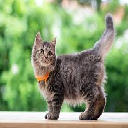

In [70]:
test_img

In [71]:
test_img = img_to_array(test_img)

In [72]:
test_img = test_img/255

In [73]:
test_img.shape

(128, 128, 3)

In [74]:
test_img = np.expand_dims(test_img, axis=0)

In [75]:
test_img.shape

(1, 128, 128, 3)

In [76]:
result = predict_model.predict(test_img)
result

1/1 [==============================] - 0s 95ms/step


array([[0.94242686]], dtype=float32)

In [77]:
result[0][0]

0.94242686

In [78]:
if result [0][0]>0.5:
    print("köpek")
    label = "dog"
else:
    print("kedi")
    label="cat"

köpek


In [79]:
model_path = "model_120_128_128.h5"
predicted_model = load_model(model_path)

In [81]:
import cv2
import numpy as np
from keras.preprocessing.image import img_to_array

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()

    # Görüntüyü yeniden boyutlandır ve modele giriş için hazırla
    frame_resized = cv2.resize(frame, (128, 128))
    test_img = img_to_array(frame_resized)
    test_img = test_img / 255.0
    test_img = np.expand_dims(test_img, axis=0)

    # Modeli kullanarak tahmin yap
    result = predict_model.predict(test_img)

    # Tahmin sonucunu kontrol et ve etiketi belirle
    if result[0][0] > 0.5:
        label = "köpek"
    else:
        label = "kedi"

    # Etiketi görüntüye ekle
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame, label, (20, 40), font, 1.0, (255, 0, 0), 3)

    # Görüntüyü göster
    cv2.imshow("sonuc", frame)

    # Çıkış için "q" tuşuna basıldığını kontrol et
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

# Kamerayı serbest bırak ve pencereyi kapat
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 32ms/step
